# Analyze
---

## multi-fx

In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

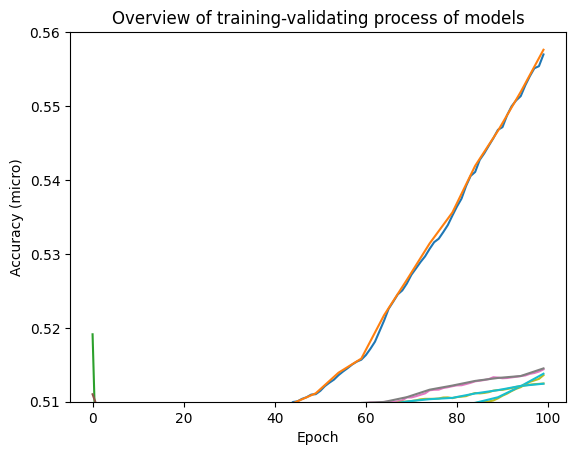

In [2]:
# pretrained-micro
log = {}
for filename in os.listdir('./pretrained_micro'):
    if filename.endswith('.json'):
        with open(f'./pretrained_micro/{filename}', 'r') as fi:
            log[filename] = json.load(fi)

# this is for micro_metric, but it's wrong since it only print out the metric of the final batch of each task
# even that, these logs're still useful in analyze the model architecture and hyper-parameters 
# when it performs on test set, the accuracy is about 70%
x_axis = np.arange(-1,100,5)
x_axis[0] = 0

plt.xlabel('Epoch')
plt.ylabel('Accuracy (micro)')
plt.title('Overview of training-validating process of models')
for model in log.keys():
    plt.plot(range(100), log[model]['train_acc'])
    plt.plot(x_axis, log[model]['val_acc'])
    # plt.title(f'{model}_acc')
    # plt.show()
    plt.ylim((0.51,0.56))
    # break

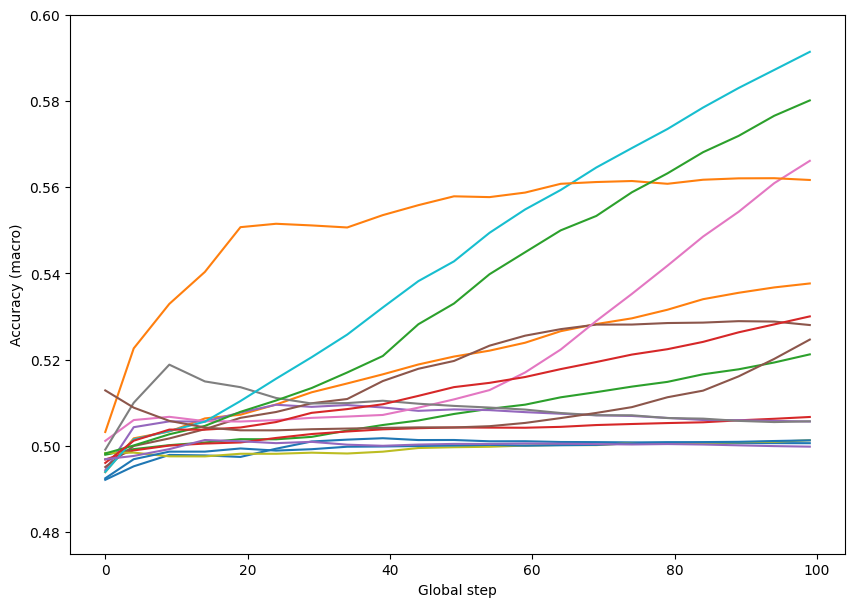

In [65]:
# pretrained-macro with mean batch acc (acc of a task is computed by taking the average of batch)
log = {}
for filename in os.listdir('./pretrained_macro'):
    if filename.endswith('.json') and filename.startswith('lstm_30'):
        with open(f'./pretrained_macro/{filename}', 'r') as fi:
            log[filename] = json.load(fi)

x_axis = np.arange(-1,100,5)
x_axis[0] = 0

plt.figure(figsize=(10,7))
plt.xlabel('Global step')
plt.ylabel('Accuracy (macro)')
# plt.title('Overview of training-validating process of models')
plt.ylim((0.475,0.6))
for model in log.keys():
    # plt.plot(range(100), log[model]['train_acc'])
    plt.plot(x_axis, log[model]['val_acc'])

plt.savefig('../doc/img/lstm_30.pdf')

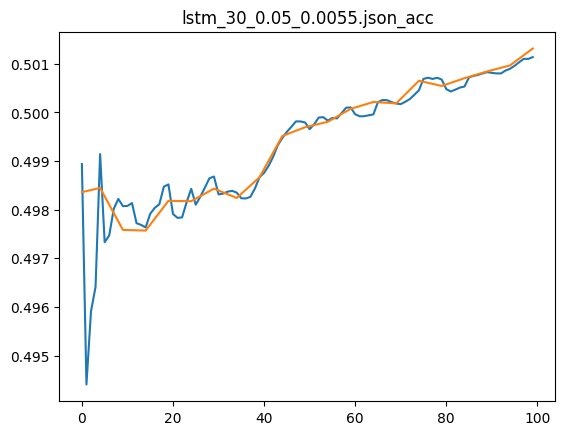

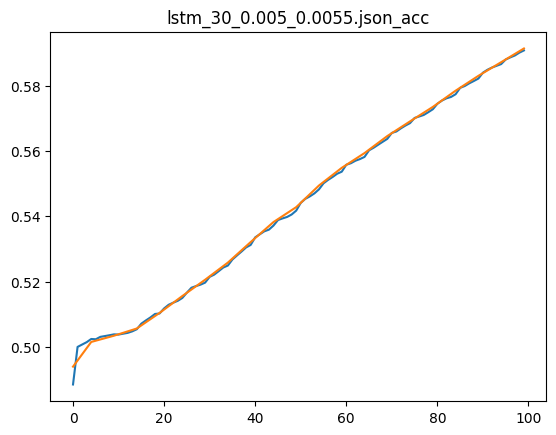

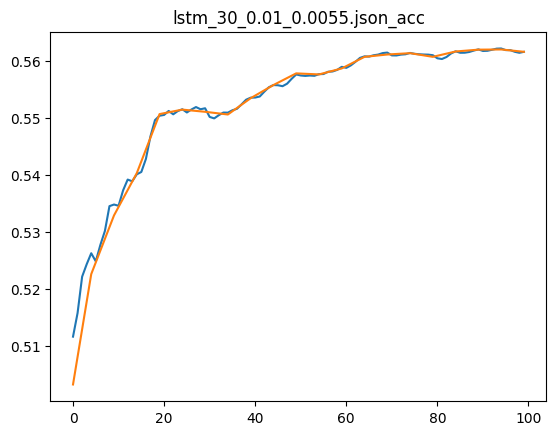

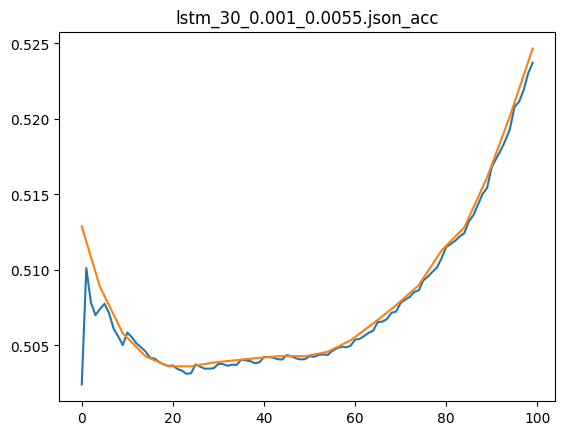

In [3]:
log = {}
for filename in os.listdir('./pretrained_macro'):
    if filename.endswith('0.0055.json') and filename.startswith('lstm_30'):
        with open(f'./pretrained_macro/{filename}', 'r') as fi:
            log[filename] = json.load(fi)

x_axis = np.arange(-1,100,5)
x_axis[0] = 0
for model in log.keys():
    plt.plot(range(100), log[model]['train_acc'])
    plt.plot(x_axis, log[model]['val_acc'])
    plt.title(f'{model}_acc')
    # plt.ylim((0.51,0.6))
    plt.show()
    # break

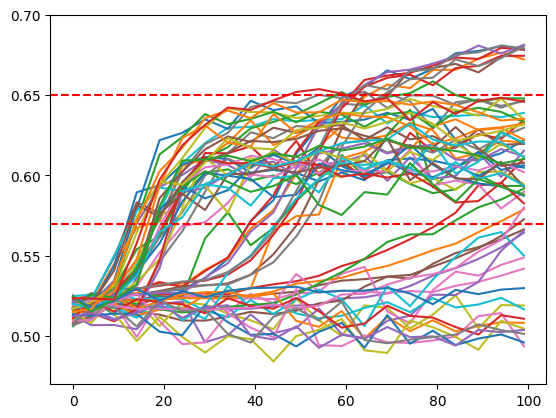

In [45]:
log = {}
dataset = 'USD_JPY'
for folder in os.listdir(f'./{dataset}'):
    if folder.startswith('lstm'):
        with open(f'./{dataset}/{folder}/3.json', 'r') as fi:
            log[folder] = json.load(fi)

x_axis = np.arange(-1,100,5)
x_axis[0] = 0
for model in log.keys():
    # plt.plot(range(100), log[model]['train_acc'])
    plt.plot(x_axis, log[model]['val_acc'])
    # plt.title(f'{model}_acc')
    plt.ylim((0.47,0.7))
    # plt.show()
    # break

plt.axhline(y=0.57, color = 'r', linestyle = '--')
plt.axhline(y=0.65, color = 'r', linestyle = '--')

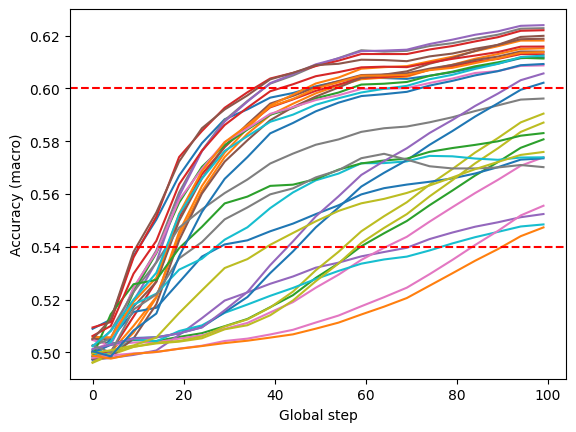

In [20]:
# pretrained-macro, acc of a task is computed accurately
log = {}
for filename in os.listdir('./pretrained_macro_random'):
    if filename.endswith('.json') and filename.startswith('lstm_cnn'):
    # if filename == 'lstm_20_0.005_0.0055.json' or filename == 'lstm_cnn_20_0.005_0.005.json':
        with open(f'./pretrained_macro_random/{filename}', 'r') as fi:
            log[filename] = json.load(fi)

x_axis = np.arange(-1,100,5)
x_axis[0] = 0

for model in log.keys():
    plt.ylim((0.49,0.63))
    plt.xlabel('Global step')
    plt.ylabel('Accuracy (macro)')
    # plt.title('Overview of training-validating process of models')
    # plt.title(f"[{model}] best_acc: {log[model]['val_acc'][-1]:.5f}")

    # plt.plot(range(100), log[model]['train_acc'], label='train_acc')
    plt.plot(x_axis, log[model]['val_acc'], label='val_acc')
    # plt.legend()
plt.axhline(y=0.54, color = 'r', linestyle = '--')
plt.axhline(y=0.60, color = 'r', linestyle = '--')
plt.savefig('../doc/img/lr.pdf', bbox_inches='tight')
plt.show()

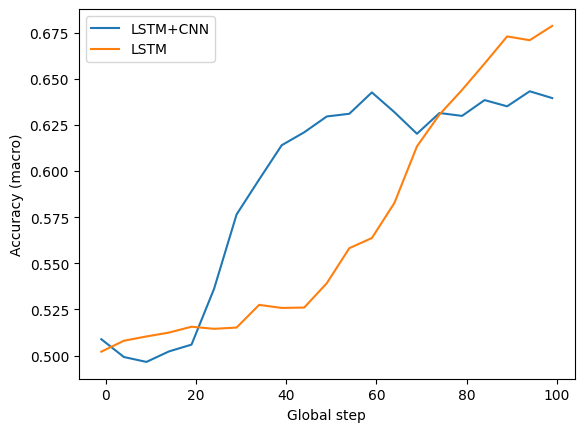

In [28]:
log = {}
# for filename in os.listdir('./pretrained_macro_random'):
#     # if filename.endswith('.json') and filename.startswith('lstm_cnn'):
#     if filename == 'lstm_20_0.005_0.0055.json' or filename == 'lstm_cnn_20_0.005_0.005.json':
#         with open(f'./pretrained_macro_random/{filename}', 'r') as fi:
#             log[filename] = json.load(fi)

with open('./multi_fx/lstm_20_0.001_0.0055/3.json', 'r') as fi:
    log['lstm'] = json.load(fi)

with open('./multi_fx/lstm_cnn_20_0.005_0.005/3.json', 'r') as fi:
    log['lstm_cnn'] = json.load(fi)

acc = np.array(log['lstm_cnn']['val_acc'])
std = np.array(log['lstm_cnn']['val_std_acc'])

acc1 = np.array(log['lstm']['val_acc'])
std1 = np.array(log['lstm']['val_std_acc'])

# Trục x
x = np.arange(-1,100,5)

plt.plot(x, acc, label='LSTM+CNN')
# plt.fill_between(x, acc - std, acc + std, alpha=0.2)

plt.plot(x, acc1, label='LSTM')
# plt.fill_between(x, acc1 - std1, acc1 + std1, alpha=0.2)

# Thêm nhãn và tiêu đề
plt.xlabel('Global step')
plt.ylabel('Accuracy (macro)')
plt.legend()

# # Hiển thị biểu đồ
# plt.savefig('../doc/img/acc.pdf', bbox_inches='tight')
# plt.show()

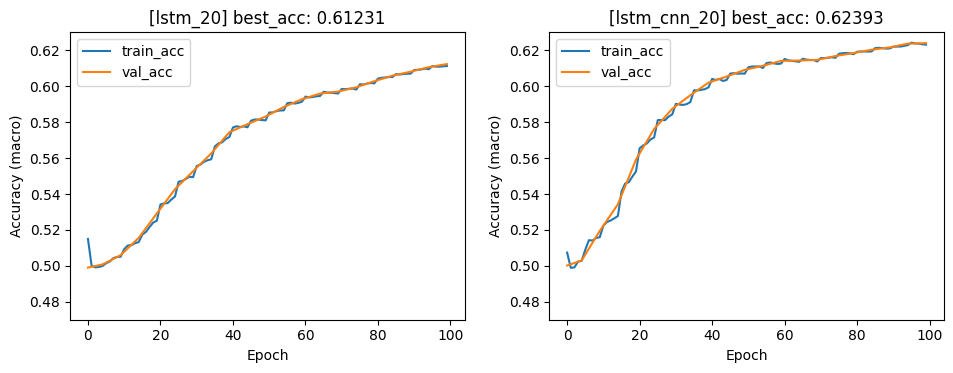

In [97]:
# if filename == 'lstm_20_0.005_0.0055.json' or filename == 'lstm_cnn_20_0.005_0.005.json':

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.tight_layout(pad=3)
# fig.subplots_adjust(hspace=0.3)

for idx, model in enumerate(log.keys()):
    axes.flat[idx].set_ylim((0.47,0.63))
    axes.flat[idx].set_xlabel('Epoch')
    axes.flat[idx].set_ylabel('Accuracy (macro)')
    # plt.title('Overview of training-validating process of models')
    axes.flat[idx].set_title(f"[{model.split('_0.')[0]}] best_acc: {log[model]['val_acc'][-1]:.5f}")

    axes.flat[idx].plot(range(100), log[model]['train_acc'], label='train_acc')
    axes.flat[idx].plot(x_axis, log[model]['val_acc'], label='val_acc')
    axes.flat[idx].legend()
plt.show()

## multi-USD/JPY

- This task should be analyze based on the output of 3 methods:
    - Split data into 60 tasks, then meta-train
    - Adapt the pre-trained multi-fx on 20% of data, then test on 80% of data
    - Use federated learning and check if it would help (maybe no need)

### Split data, then meta-train

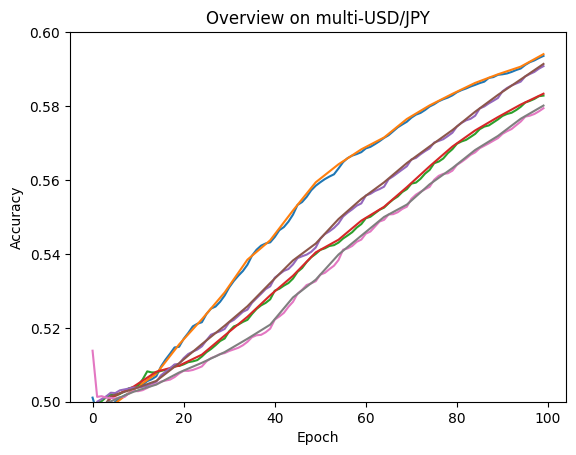

In [5]:
# function `submit_tunned_model` in submit_jobs.py, submit our 3 best models
import matplotlib.pyplot as plt
import json
import os
import numpy as np

log = {}
for filename in os.listdir('./pretrained_macro_jp'):
    if filename.endswith('.json'):
        with open(f'./pretrained_macro/{filename}', 'r') as fi:
            log[filename] = json.load(fi)

x_axis = np.arange(-1,100,5)
x_axis[0] = 0
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Overview on multi-USD/JPY')
for model in log.keys():
    plt.plot(range(100), log[model]['train_acc'])
    plt.plot(x_axis, log[model]['val_acc'])
    # plt.title(f'{model}_acc')
    plt.ylim((0.5,0.6))
    # plt.show()
    # break

### Adapt pre-trained multi-fx model

- I've tried the following code in `fx` repo
- The results are quite bad even when I increased the epoch
- I think that the model should be more complicated to fit such a big data like that (in meta-learning, we only fit a small amount of data, so the model doesn't have to be complicated)

In [ ]:
# this code should be run in `pre_process.py` in `fx` repo

import tensorflow as tf
from keras import optimizers, models, metrics
from common.common import get_data
import json

info = get_data("u", "h", 30)
X_train = np.array(info['X_train'])
X_val = np.array(info['X_val'])
y_train = np.where(np.array(info["y_train"]) > 0, 1, 0)
y_val = np.where(np.array(info["y_val"]) > 0, 1, 0)

tf.config.threading.set_inter_op_parallelism_threads(26)
tf.config.threading.set_intra_op_parallelism_threads(26)

pre_trained:models.Model = tf.keras.models.load_model('/home/s2210434/multi_fx/pretrained_macro/lstm_30_0.005_0.0055.keras')
pre_trained.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=metrics.binary_crossentropy, metrics=['accuracy'])
history = pre_trained.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_val, y_val))
with open('./tmp.json', 'w') as fo:
    json.dump(str(history), fo)

## Prove that AutoKeras's suck

In [98]:
import matplotlib.pyplot as plt
import os

def draw_process(log_path:str, ax):
    # read all lines
    with open(log_path, 'r') as fi:
        data = fi.readlines()

    # extract best accuracy
    best_acc = float(data[-2].split(': ')[-1])

    # detect training process which achieves the best acc
    trigger_str = 'Best val_accuracy'
    prev_trigger = -1
    cur_trigger = -1
    for idx, line in enumerate(data):
        if str(best_acc) in line and trigger_str in line:
            cur_trigger = idx
            print(prev_trigger, idx)
            break
        if trigger_str in line:
            prev_trigger = idx

    # extract this training process
    accuracies = []
    losses = []
    for idx, line in enumerate(data[prev_trigger: cur_trigger]):
        if 'val_loss' in line:
            splitted_components = line.split('-')
            acc = float(splitted_components[-2].split(':')[-1])
            loss = float(splitted_components[-1].split(':')[-1])
            accuracies.append(acc)
            losses.append(loss)

    # draw
    ax.plot(accuracies, label='val_acc')
    ax.set_title(f'[{log_path.split("/")[-1].split(".log")[0]}] best_acc: {best_acc:.5f}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.set_ylim(0.47, 0.63)


1164345 1178572
77763 79773
211995 214663
810557 816228
867205 875422
242740 244800
125652 126770
152881 154287


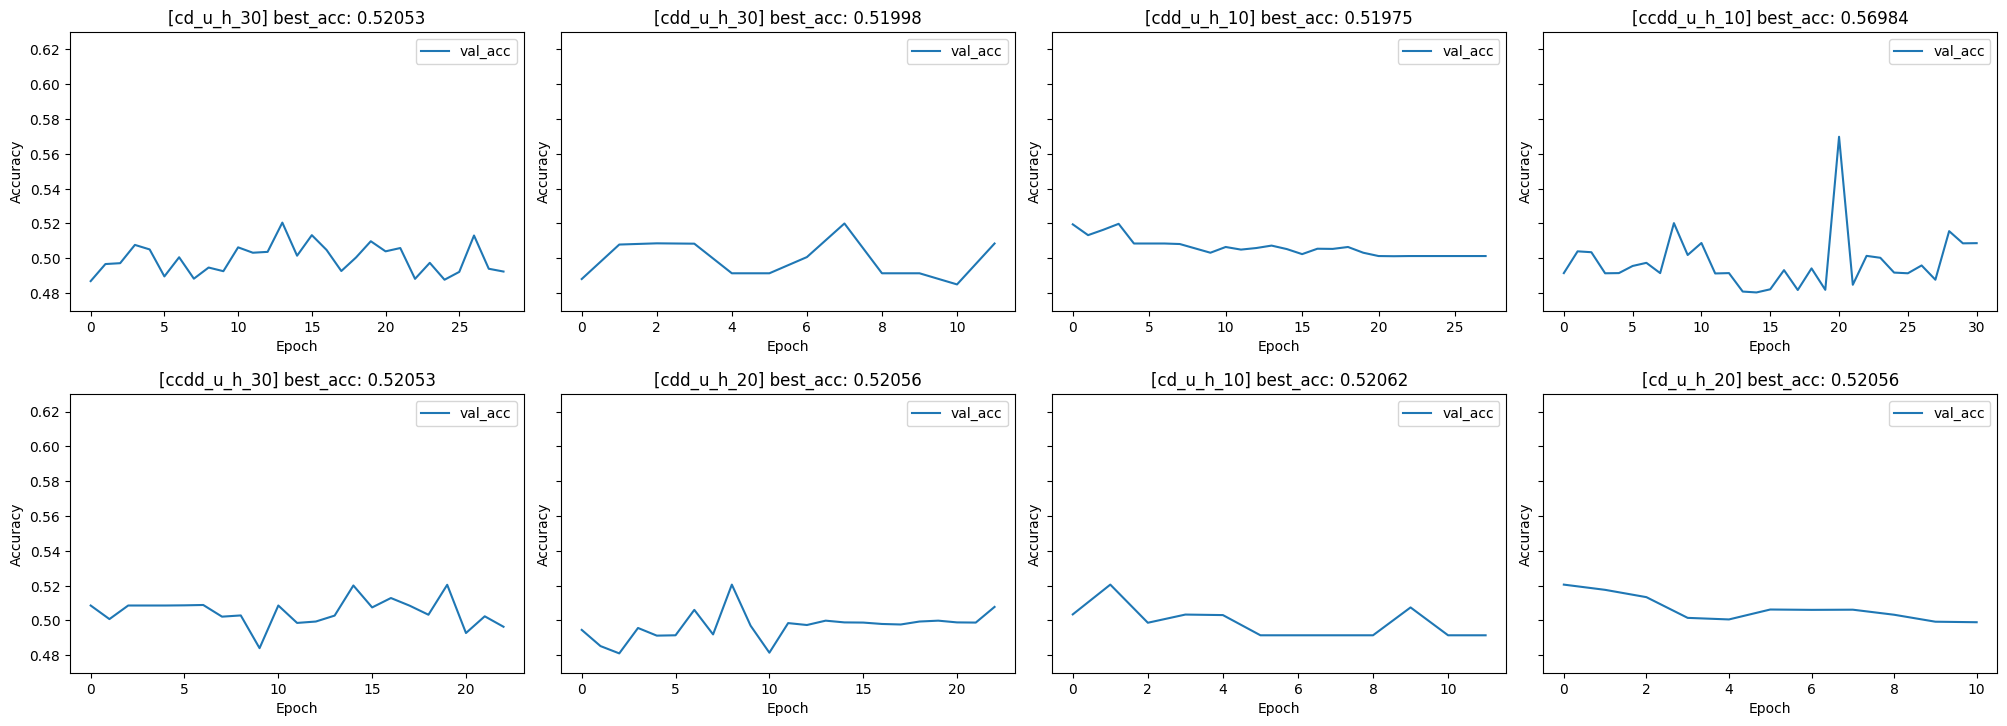

In [99]:
fig, axs = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20,7))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

log_dir = '/home/s2210434/fx/execute/log/multi_fx_log'
count = 0
for filename in os.listdir(log_dir):
    if filename != 'ccdd_u_h_20.log':
        draw_process(f'{log_dir}/{filename}', axs.flat[count])
        count += 1
    # try:
    #     draw_process(f'{log_dir}/{filename}')
    # except:
    #     print(filename)

## New `multi-fx`

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [25]:
dir = './USD_JPY'
rs = {}
for model_name in os.listdir(dir):
    if model_name.startswith('lstm'):
        with open(os.path.join(dir, model_name, 'summary.json'), 'r') as fi:
            rs[model_name] = json.load(fi)

rs.keys()

dict_keys(['lstm_cnn_30_0.001_0.0055', 'lstm_cnn_20_0.001_0.005', 'lstm_cnn_20_0.01_0.0015', 'lstm_20_0.001_0.0015', 'lstm_cnn_30_0.001_0.001', 'lstm_cnn_20_0.001_0.001', 'lstm_30_0.001_0.001', 'lstm_30_0.01_0.005', 'lstm_20_0.05_0.0015', 'lstm_cnn_30_0.005_0.005', 'lstm_20_0.01_0.0055', 'lstm_cnn_30_0.01_0.0055', 'lstm_cnn_30_0.05_0.0015', 'lstm_cnn_20_0.001_0.0055', 'lstm_20_0.01_0.001', 'lstm_30_0.001_0.0015', 'lstm_20_0.05_0.001', 'lstm_30_0.005_0.0055', 'lstm_cnn_20_0.01_0.001', 'lstm_30_0.05_0.005', 'lstm_20_0.01_0.0015', 'lstm_20_0.001_0.001', 'lstm_30_0.005_0.005', 'lstm_cnn_20_0.005_0.0055', 'lstm_cnn_20_0.05_0.001', 'lstm_30_0.001_0.0055', 'lstm_cnn_30_0.01_0.001', 'lstm_30_0.005_0.0015', 'lstm_20_0.005_0.005', 'lstm_cnn_30_0.05_0.005', 'lstm_cnn_20_0.01_0.005', 'lstm_cnn_30_0.05_0.0055', 'lstm_cnn_20_0.001_0.0015', 'lstm_20_0.001_0.005', 'lstm_cnn_20_0.005_0.0015', 'lstm_cnn_20_0.005_0.005', 'lstm_20_0.005_0.001', 'lstm_30_0.001_0.005', 'lstm_cnn_20_0.01_0.0055', 'lstm_30_0.

In [26]:
df = pd.DataFrame(rs)
df

,lstm_cnn_30_0.001_0.0055,lstm_cnn_20_0.001_0.005,lstm_cnn_20_0.01_0.0015,lstm_20_0.001_0.0015,lstm_cnn_30_0.001_0.001,lstm_cnn_20_0.001_0.001,lstm_30_0.001_0.001,lstm_30_0.01_0.005,lstm_20_0.05_0.0015,lstm_cnn_30_0.005_0.005,...,lstm_20_0.05_0.0055,lstm_cnn_30_0.01_0.0015,lstm_cnn_30_0.001_0.0015,lstm_cnn_20_0.05_0.0055,lstm_30_0.01_0.0055,lstm_30_0.005_0.001,lstm_30_0.05_0.0055,lstm_20_0.005_0.0055,lstm_20_0.005_0.0015,lstm_cnn_30_0.005_0.0055
2,"{'acc': '0.50062 ± 0.01217', 'precision': '0.5...","{'acc': '0.50371 ± 0.01195', 'precision': '0.5...","{'acc': '0.50649 ± 0.01020', 'precision': '0.5...","{'acc': '0.50055 ± 0.01126', 'precision': '0.5...","{'acc': '0.50359 ± 0.01264', 'precision': '0.5...","{'acc': '0.50179 ± 0.01422', 'precision': '0.5...","{'acc': '0.50271 ± 0.01392', 'precision': '0.5...","{'acc': '0.50746 ± 0.01299', 'precision': '0.5...","{'acc': '0.50515 ± 0.01024', 'precision': '0.5...","{'acc': '0.50618 ± 0.01417', 'precision': '0.5...",...,"{'acc': '0.49777 ± 0.01512', 'precision': '0.4...","{'acc': '0.50268 ± 0.01319', 'precision': '0.4...","{'acc': '0.50608 ± 0.01306', 'precision': '0.5...","{'acc': '0.49391 ± 0.01216', 'precision': '0.4...","{'acc': '0.50062 ± 0.00937', 'precision': '0.5...","{'acc': '0.50160 ± 0.01157', 'precision': '0.5...","{'acc': '0.50224 ± 0.01240', 'precision': '0.5...","{'acc': '0.50240 ± 0.00877', 'precision': '0.5...","{'acc': '0.50156 ± 0.01353', 'precision': '0.5...","{'acc': '0.50251 ± 0.01542', 'precision': '0.5..."
0,"{'acc': '0.90392 ± 0.01685', 'precision': '0.9...","{'acc': '0.88796 ± 0.03330', 'precision': '0.8...","{'acc': '0.79311 ± 0.04366', 'precision': '0.8...","{'acc': '0.83485 ± 0.05561', 'precision': '0.8...","{'acc': '0.67510 ± 0.03788', 'precision': '0.6...","{'acc': '0.70865 ± 0.03383', 'precision': '0.7...","{'acc': '0.80248 ± 0.04058', 'precision': '0.8...","{'acc': '0.81639 ± 0.04564', 'precision': '0.8...","{'acc': '0.70248 ± 0.11857', 'precision': '0.7...","{'acc': '0.82738 ± 0.04390', 'precision': '0.8...",...,"{'acc': '0.76962 ± 0.07329', 'precision': '0.7...","{'acc': '0.83014 ± 0.04957', 'precision': '0.8...","{'acc': '0.71812 ± 0.04255', 'precision': '0.7...","{'acc': '0.78109 ± 0.07125', 'precision': '0.7...","{'acc': '0.81242 ± 0.05026', 'precision': '0.8...","{'acc': '0.81349 ± 0.04448', 'precision': '0.8...","{'acc': '0.79608 ± 0.07480', 'precision': '0.8...","{'acc': '0.85193 ± 0.04200', 'precision': '0.8...","{'acc': '0.84961 ± 0.03241', 'precision': '0.8...","{'acc': '0.86352 ± 0.02929', 'precision': '0.8..."
1,"{'acc': '0.68760 ± 0.01097', 'precision': '0.6...","{'acc': '0.68792 ± 0.01129', 'precision': '0.6...","{'acc': '0.59273 ± 0.02189', 'precision': '0.5...","{'acc': '0.57357 ± 0.01447', 'precision': '0.5...","{'acc': '0.55001 ± 0.01825', 'precision': '0.5...","{'acc': '0.55548 ± 0.01674', 'precision': '0.5...","{'acc': '0.54641 ± 0.01432', 'precision': '0.5...","{'acc': '0.59263 ± 0.01855', 'precision': '0.5...","{'acc': '0.51595 ± 0.02765', 'precision': '0.4...","{'acc': '0.62655 ± 0.02957', 'precision': '0.6...",...,"{'acc': '0.54370 ± 0.02367', 'precision': '0.2...","{'acc': '0.57053 ± 0.02635', 'precision': '0.5...","{'acc': '0.58091 ± 0.01922', 'precision': '0.5...","{'acc': '0.51810 ± 0.02488', 'precision': '0.5...","{'acc': '0.59519 ± 0.03219', 'precision': '0.6...","{'acc': '0.58478 ± 0.02930', 'precision': '0.5...","{'acc': '0.54438 ± 0.02157', 'precision': '0.3...","{'acc': '0.62313 ± 0.01631', 'precision': '0.6...","{'acc': '0.60034 ± 0.02223', 'precision': '0.6...","{'acc': '0.60570 ± 0.03126', 'precision': '0.6..."
3,"{'acc': '0.67911 ± 0.01427', 'precision': '0.6...","{'acc': '0.67080 ± 0.01988', 'precision': '0.6...","{'acc': '0.57843 ± 0.02467', 'precision': '0.5...","{'acc': '0.59970 ± 0.02074', 'precision': '0.6...","{'acc': '0.57063 ± 0.01887', 'precision': '0.5...","{'acc': '0.56914 ± 0.01625', 'precision': '0.5...","{'acc': '0.54365 ± 0.02419', 'precision': '0.5...","{'acc': '0.64006 ± 0.02131', 'precision': '0.

In [27]:
get_acc = lambda metrics: float(metrics['acc'].split('±')[0])
for col in df.columns:
    df[col] = df[col].apply(get_acc)

df

,lstm_cnn_30_0.001_0.0055,lstm_cnn_20_0.001_0.005,lstm_cnn_20_0.01_0.0015,lstm_20_0.001_0.0015,lstm_cnn_30_0.001_0.001,lstm_cnn_20_0.001_0.001,lstm_30_0.001_0.001,lstm_30_0.01_0.005,lstm_20_0.05_0.0015,lstm_cnn_30_0.005_0.005,...,lstm_20_0.05_0.0055,lstm_cnn_30_0.01_0.0015,lstm_cnn_30_0.001_0.0015,lstm_cnn_20_0.05_0.0055,lstm_30_0.01_0.0055,lstm_30_0.005_0.001,lstm_30_0.05_0.0055,lstm_20_0.005_0.0055,lstm_20_0.005_0.0015,lstm_cnn_30_0.005_0.0055
2,0.50062,0.50371,0.50649,0.50055,0.50359,0.50179,0.50271,0.50746,0.50515,0.50618,...,0.49777,0.50268,0.50608,0.49391,0.50062,0.50160,0.50224,0.50240,0.50156,0.50251
0,0.90392,0.88796,0.79311,0.83485,0.67510,0.70865,0.80248,0.81639,0.70248,0.82738,...,0.76962,0.83014,0.71812,0.78109,0.81242,0.81349,0.79608,0.85193,0.84961,0.86352
1,0.68760,0.68792,0.59273,0.57357,0.55001,0.55548,0.54641,0.59263,0.51595,0.62655,...,0.54370,0.57053,0.58091,0.51810,0.59519,0.58478,0.54438,0.62313,0.60034,0.60570
3,0.67911,0.67080,0.57843,0.59970,0.57063,0.56914,0.54365,0.64006,0.53156,0.61594,...,0.50998,0.60806,0.57552,0.49562,0.63039,0.60584,0.52097,0.62960,0.60880,0.61335


In [28]:
df = df.transpose()
df

,2,0,1,3
lstm_cnn_30_0.001_0.0055,0.50062,0.90392,0.68760,0.67911
lstm_cnn_20_0.001_0.005,0.50371,0.88796,0.68792,0.67080
lstm_cnn_20_0.01_0.0015,0.50649,0.79311,0.59273,0.57843
lstm_20_0.001_0.0015,0.50055,0.83485,0.57357,0.59970
lstm_cnn_30_0.001_0.001,0.50359,0.67510,0.55001,0.57063
...,...,...,...,...
lstm_30_0.005_0.001,0.50160,0.81349,0.58478,0.60584
lstm_30_0.05_0.0055,0.50224,0.79608,0.54438,0.52097
lstm_20_0.005_0.0055,0.50240,0.85193,0.62313,0.62960
lstm_20_0.005_0.0015,0.50156,0.84961,0.60034,0.60880


In [9]:
def get_max_acc(dir:str):
    rs = {}
    for model_name in os.listdir(dir):
        if model_name.startswith('lstm'):
            try:
                with open(os.path.join(dir, model_name, 'summary.json'), 'r') as fi:
                    rs[model_name] = json.load(fi)
            except:
                pass
    df = pd.DataFrame(rs)

    get_acc = lambda metrics: float(metrics['acc'].split('±')[0])
    for col in df.columns:
        df[col] = df[col].apply(get_acc)

    df = df.transpose()

    return df.describe().tail(1)
    # return df

get_max_acc('./wth')

,0,1,2,3,4,5,6,7,8,9,10,11
max,0.95784,0.82128,0.8232,0.78099,0.72387,0.72491,0.68685,0.66467,0.64921,0.74256,0.73981,0.73923


In [17]:
dir = './ett_60tasks'
rs = {}
for model_name in os.listdir(dir):
    if model_name.startswith('lstm'):
        rs[model_name] = {}
        for feature in os.listdir(os.path.join(dir, model_name)):
            if feature.endswith('.json'):
                with open(os.path.join(dir, model_name, feature), 'r') as fi:
                    rs[model_name][feature] = json.load(fi)

print(rs.keys())
print(rs['lstm_cnn_30_0.001_0.0055'].keys())

dict_keys(['lstm_cnn_30_0.001_0.0055', 'lstm_cnn_20_0.001_0.005', 'lstm_cnn_20_0.01_0.0015', 'lstm_20_0.001_0.0015', 'lstm_cnn_30_0.001_0.001', 'lstm_cnn_20_0.001_0.001', 'lstm_30_0.001_0.001', 'lstm_30_0.01_0.005', 'lstm_20_0.05_0.0015', 'lstm_cnn_30_0.005_0.005', 'lstm_20_0.01_0.0055', 'lstm_cnn_30_0.01_0.0055', 'lstm_cnn_30_0.05_0.0015', 'lstm_cnn_20_0.001_0.0055', 'lstm_20_0.01_0.001', 'lstm_30_0.001_0.0015', 'lstm_20_0.05_0.001', 'lstm_30_0.005_0.0055', 'lstm_cnn_20_0.01_0.001', 'lstm_30_0.05_0.005', 'lstm_20_0.01_0.0015', 'lstm_20_0.001_0.001', 'lstm_30_0.005_0.005', 'lstm_cnn_20_0.005_0.0055', 'lstm_cnn_20_0.05_0.001', 'lstm_30_0.001_0.0055', 'lstm_cnn_30_0.01_0.001', 'lstm_30_0.005_0.0015', 'lstm_20_0.005_0.005', 'lstm_cnn_30_0.05_0.005', 'lstm_cnn_20_0.01_0.005', 'lstm_cnn_30_0.05_0.0055', 'lstm_cnn_20_0.001_0.0015', 'lstm_20_0.001_0.005', 'lstm_cnn_20_0.005_0.0015', 'lstm_cnn_20_0.005_0.005', 'lstm_20_0.005_0.001', 'lstm_30_0.001_0.005', 'lstm_cnn_20_0.01_0.0055', 'lstm_30_0.

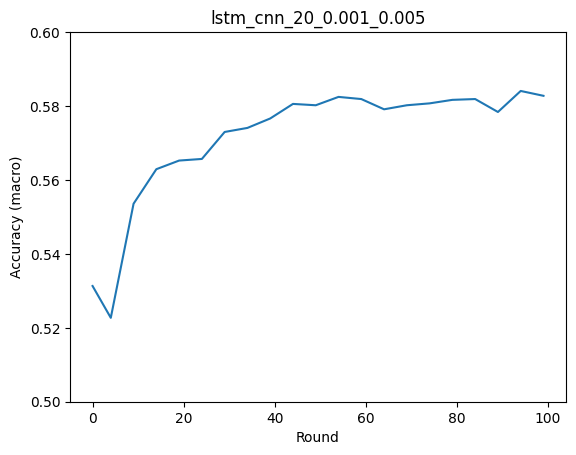

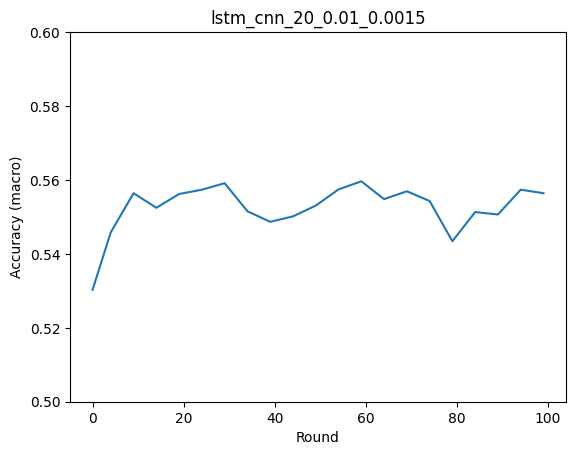

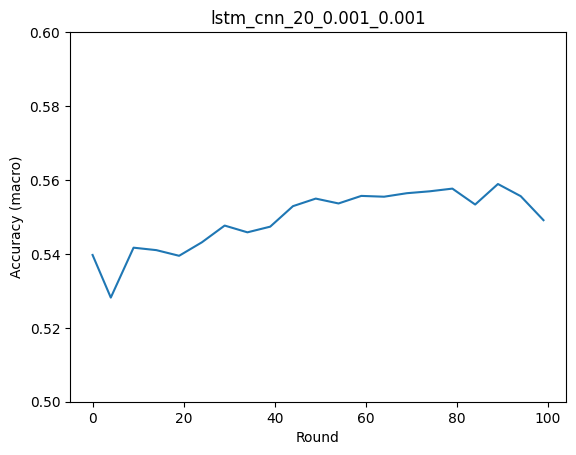

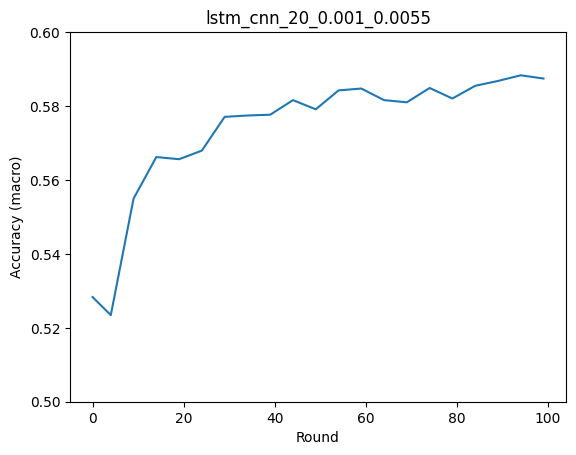

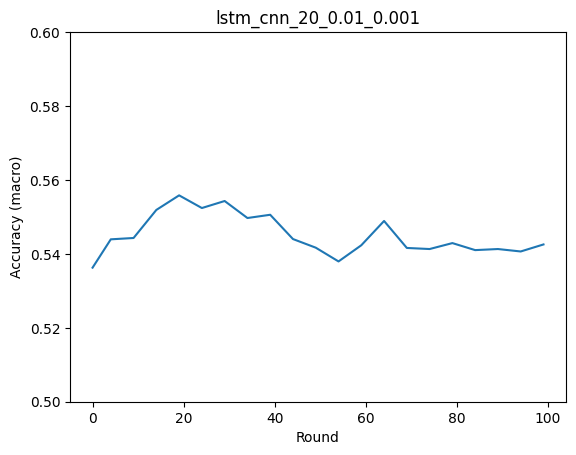

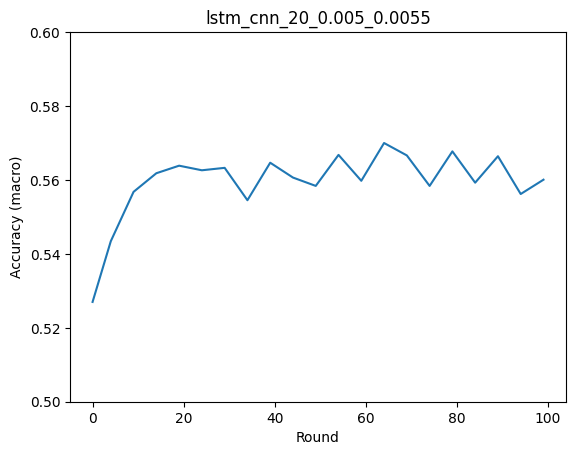

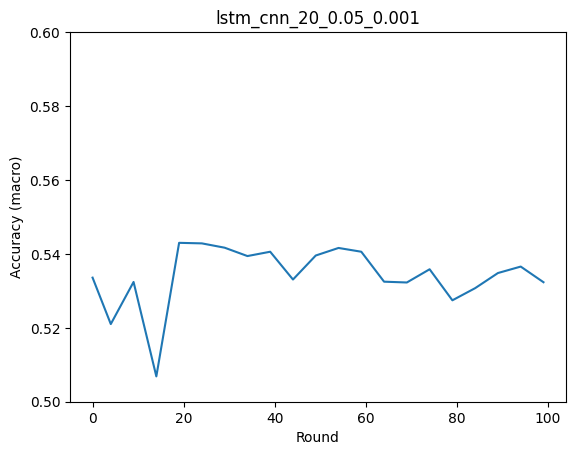

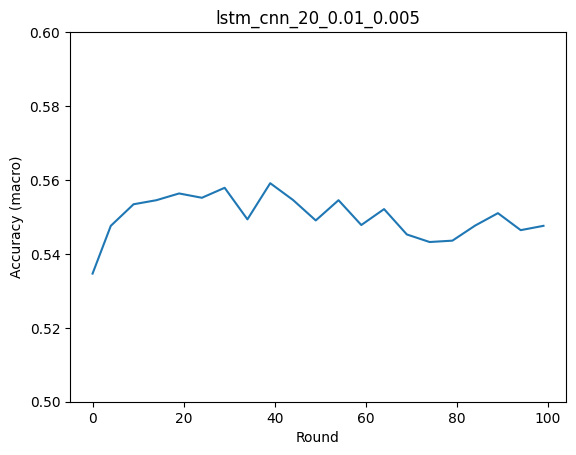

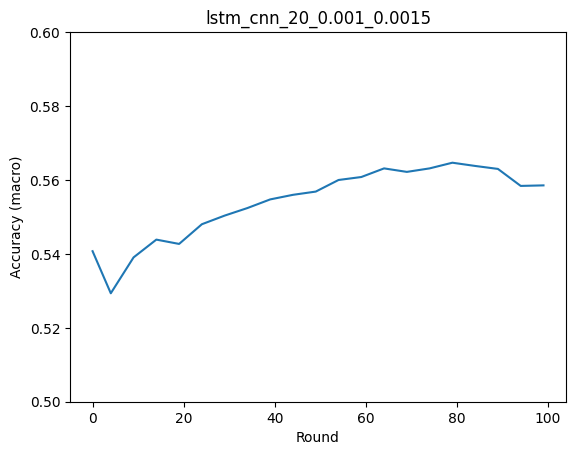

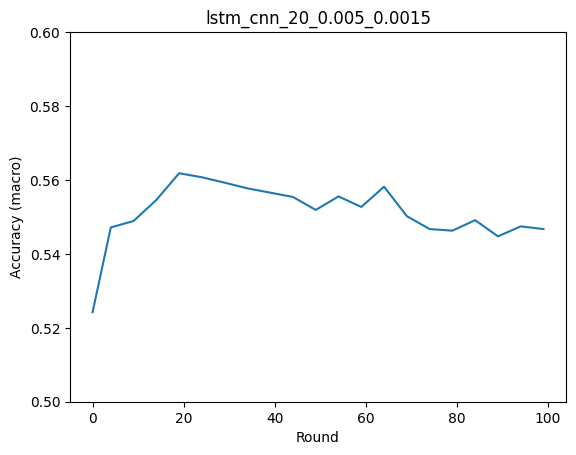

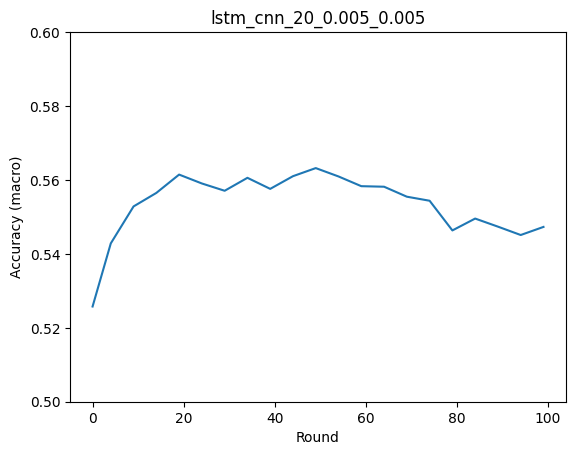

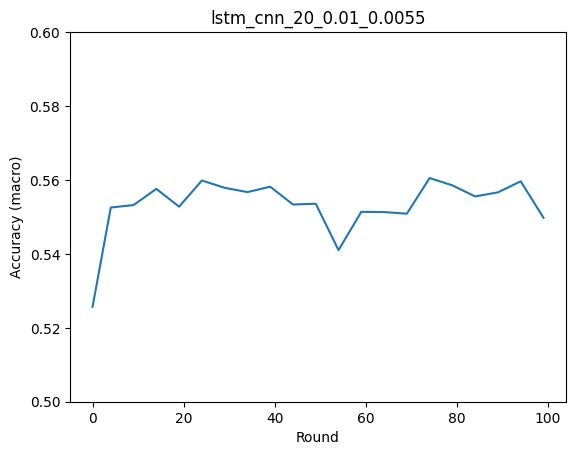

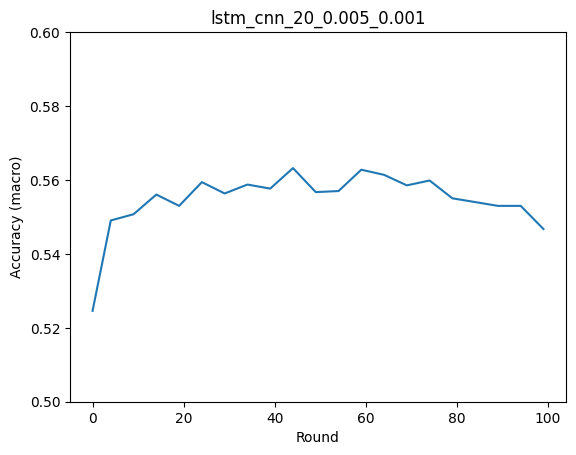

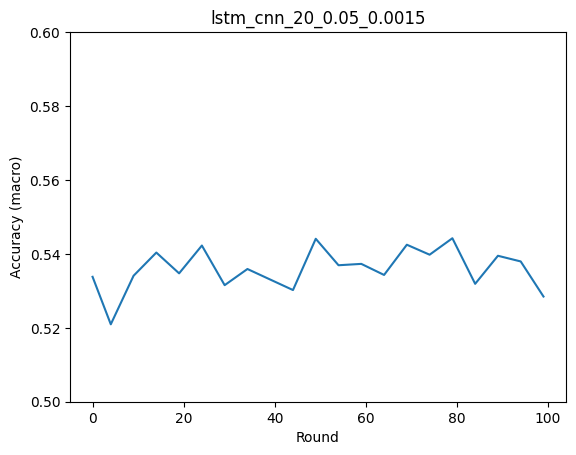

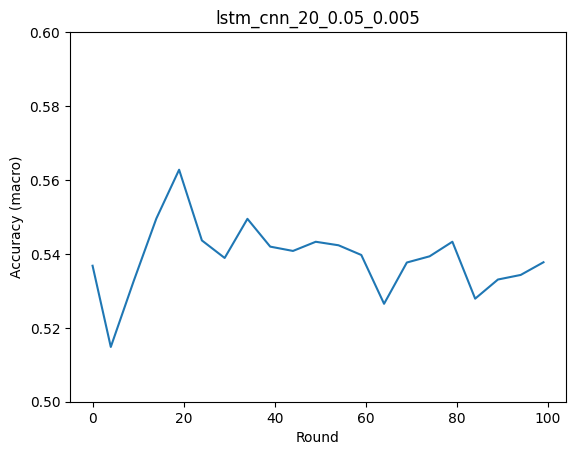

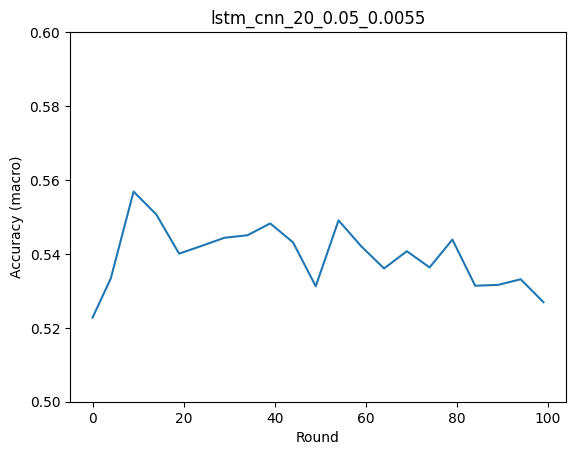

In [37]:
x_axis = np.arange(-1,100,5)
x_axis[0] = 0

for model_name in rs.keys():
    if model_name.startswith('lstm_cnn_20'):
        # plt.figure(figsize=(10,7))
        for feature in rs[model_name].keys():
            if feature == '0.json':
                plt.plot(x_axis, rs[model_name][feature]['val_acc'], label=feature)
        # plt.legend()
        plt.title(model_name)
        plt.xlabel('Round')
        plt.ylabel('Accuracy (macro)')
        plt.ylim((0.5, 0.6))
        plt.show()
        # break

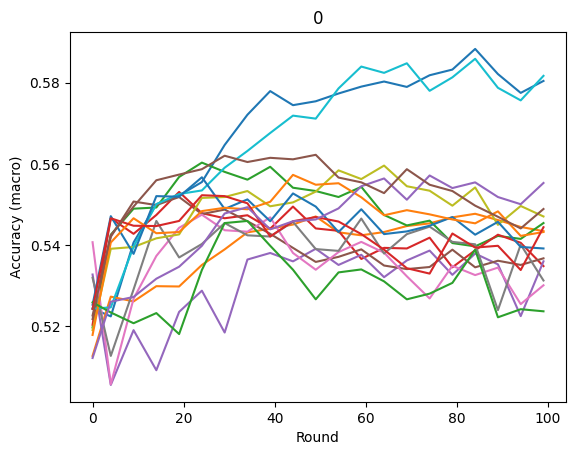

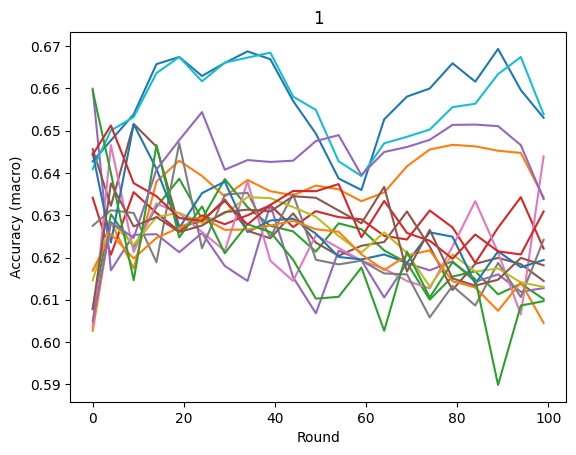

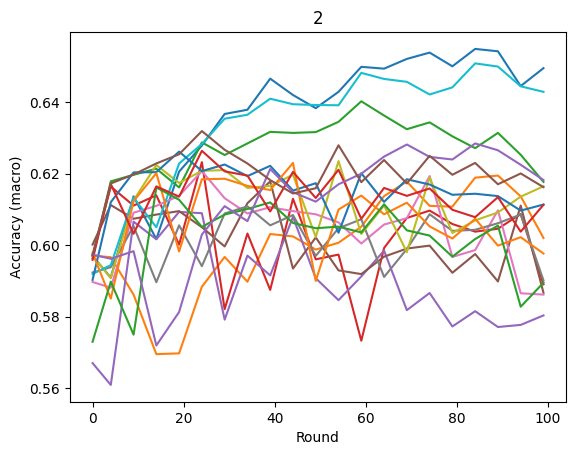

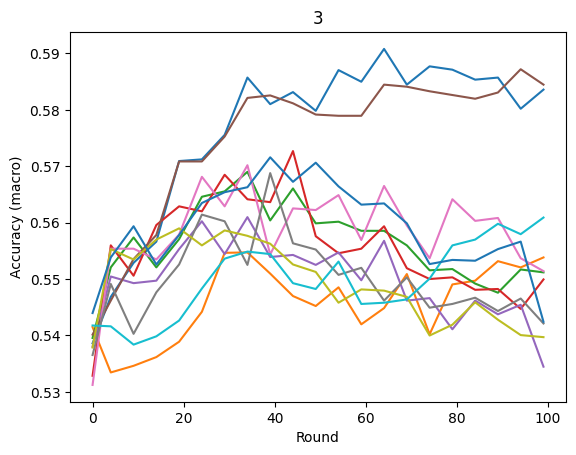

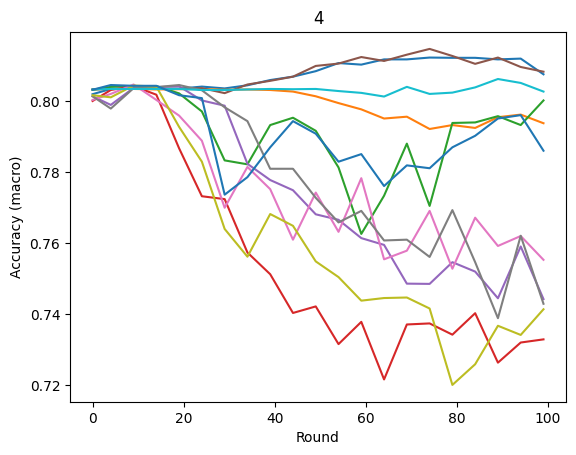

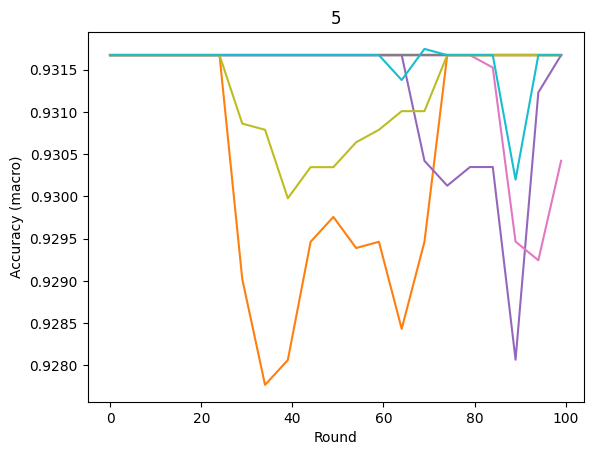

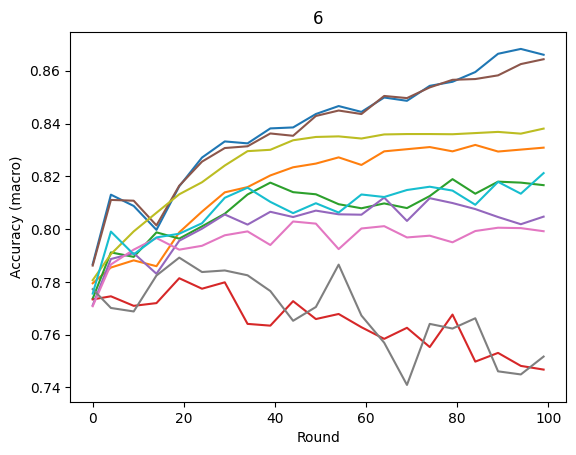

In [69]:
def visualize_acc(dir:str, num_labels:int):
    rs = {}
    for model_name in os.listdir(dir):
        if model_name.startswith('lstm'):
            rs[model_name] = {}
            for feature in os.listdir(os.path.join(dir, model_name)):
                if feature.endswith('.json'):
                    with open(os.path.join(dir, model_name, feature), 'r') as fi:
                        rs[model_name][feature] = json.load(fi)

    x_axis = np.arange(-1,100,5)
    x_axis[0] = 0

    for label in range(num_labels):
        for model_name in rs.keys():
            if model_name.startswith('lstm_cnn_30'):
                try:
                    plt.plot(x_axis, rs[model_name][f'{label}.json']['val_acc'])
                except:
                    pass

        # plt.legend()
        plt.title(label)
        plt.xlabel('Round')
        plt.ylabel('Accuracy (macro)')
        # plt.ylim((0.5, 0.9))
        plt.show()
        # break

visualize_acc('./ett', 7)

### NHITS - `multi-fx`

In [3]:
dir = './baseline'
log = {}
for model_name in os.listdir(dir):
    if model_name.startswith('NHITS-wth'):
        with open(f'./baseline/{model_name}', 'r') as fi:
            log[model_name] = json.load(fi)

log.keys()

dict_keys(['NHITS-wth-6.json', 'NHITS-wth-4.json', 'NHITS-wth-9.json', 'NHITS-wth-7.json', 'NHITS-wth-0.json', 'NHITS-wth-11.json', 'NHITS-wth-2.json', 'NHITS-wth-1.json', 'NHITS-wth-5.json', 'NHITS-wth-3.json', 'NHITS-wth-8.json', 'NHITS-wth-10.json'])

In [4]:
for key in log.keys():
    for id_model in log[key].keys():
        log[key][id_model] = log[key][id_model]['acc']

df = pd.DataFrame(log)
df

,NHITS-wth-6.json,NHITS-wth-4.json,NHITS-wth-9.json,NHITS-wth-7.json,NHITS-wth-0.json,NHITS-wth-11.json,NHITS-wth-2.json,NHITS-wth-1.json,NHITS-wth-5.json,NHITS-wth-3.json,NHITS-wth-8.json,NHITS-wth-10.json
1,0.672276,0.694096,0.707929,0.664860,0.974187,0.679407,0.783086,0.783514,0.705077,0.732601,0.663862,0.686965
2,0.637193,0.659156,0.699230,0.602966,0.951940,0.688534,0.781660,0.776669,0.663577,0.731888,0.583999,0.690245
3,0.637764,0.673987,0.699230,0.616942,0.956931,0.690531,0.776241,0.779663,0.676840,0.716058,0.589561,0.709213
4,0.672276,0.694096,0.707929,0.664860,0.974187,0.679407,0.783086,0.783514,0.705077,0.732601,0.663862,0.686965
5,0.637193,0.659156,0.699230,0.602966,0.951940,0.688534,0.781660,0.776669,0.663577,0.731888,0.583999,0.690245
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.657302,0.689817,0.711637,0.637051,0.970622,0.696378,0.794638,0.789504,0.686680,0.743725,0.608956,0.698232
72,0.644324,0.679407,0.711209,0.635482,0.973617,0.699230,0.783657,0.776383,0.683685,0.738163,0.610525,0.706931
73,0.667713,0.694952,0.714917,0.661723,0.976184,0.686252,0.777382,0.775670,0.707501,0.725898,0.656161,0.693525
74,0.657302,0.689817,0.711637,0.637051,0.970622,0.696378,0.794638,0.789504,0.686680,0.743725,0.608956,0.698232


In [5]:
df.describe()

,NHITS-wth-6.json,NHITS-wth-4.json,NHITS-wth-9.json,NHITS-wth-7.json,NHITS-wth-0.json,NHITS-wth-11.json,NHITS-wth-2.json,NHITS-wth-1.json,NHITS-wth-5.json,NHITS-wth-3.json,NHITS-wth-8.json,NHITS-wth-10.json
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.655115,0.686937,0.711884,0.635777,0.963757,0.690179,0.783980,0.781441,0.689741,0.730795,0.620821,0.699962
std,0.012928,0.013977,0.007383,0.021368,0.011090,0.007739,0.008332,0.008798,0.014353,0.008376,0.026356,0.007588
min,0.637193,0.659156,0.699230,0.602966,0.944238,0.675841,0.771535,0.769110,0.663577,0.716058,0.583999,0.686965
25%,0.644324,0.674273,0.707929,0.616942,0.953651,0.684541,0.777382,0.775670,0.679692,0.723474,0.606104,0.693525
50%,0.651597,0.686965,0.711780,0.636052,0.970622,0.689675,0.783086,0.779806,0.686680,0.731888,0.609384,0.700656
75%,0.668568,0.695237,0.716058,0.660724,0.974187,0.696378,0.788220,0.783514,0.706075,0.738163,0.655876,0.706931
max,0.673274,0.709498,0.726611,0.671420,0.976184,0.706075,0.802767,0.802339,0.712921,0.743725,0.663862,0.711352


In [16]:
def get_max_acc_nhits(dir:str, dataset:str):
    log = {}
    for model_name in os.listdir(dir):
        if model_name.startswith(f'NHITS-{dataset}'):
            with open(f'./baseline/{model_name}', 'r') as fi:
                log[model_name] = json.load(fi)

    for key in log.keys():
        for id_model in log[key].keys():
            log[key][id_model] = log[key][id_model]['f1']

    df = pd.DataFrame(log)
    cols = list(df.columns)
    cols.sort()
    df = df[cols]
    return df.describe()

# profile = get_max_acc_nhits('./baseline', 'USD_JPY')
# profile = get_max_acc_nhits('./baseline', 'multi_fx')
profile = get_max_acc_nhits('./baseline', 'ett')
# profile = get_max_acc_nhits('./baseline', 'wth')
# np.mean(profile.tail(1)), np.std(profile.tail(1), axis=1)
profile
# get_max_acc_nhits('./baseline', 'wth')

,NHITS-ett-0.json,NHITS-ett-1.json,NHITS-ett-2.json,NHITS-ett-3.json,NHITS-ett-4.json,NHITS-ett-5.json,NHITS-ett-6.json
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.556131,0.601080,0.529814,0.550876,0.555544,0.497313,0.874060
std,0.034225,0.026933,0.038025,0.039387,0.052311,0.017750,0.007720
min,0.485086,0.517747,0.474001,0.475118,0.460914,0.479903,0.854920
25%,0.520368,0.595617,0.480464,0.507221,0.509080,0.480727,0.870320
50%,0.567197,0.611336,0.541274,0.571640,0.571566,0.488562,0.875012
75%,0.585594,0.618622,0.561586,0.579672,0.603586,0.509355,0.879361
max,0.593426,0.625243,0.586037,0.589204,0.619763,0.533142,0.882815


In [27]:
# get_max_acc('./ett_60tasks')

def get_max_acc(dir:str):
    rs = {}
    for model_name in os.listdir(dir):
        if model_name.startswith('lstm'):
            try:
                with open(os.path.join(dir, model_name, 'summary.json'), 'r') as fi:
                    rs[model_name] = json.load(fi)
            except:
                pass
    df = pd.DataFrame(rs)

    get_acc = lambda metrics: float(metrics['acc'].split('±')[1])
    for col in df.columns:
        df[col] = df[col].apply(get_acc)

    df = df.transpose()

    return df

    # return df.describe().tail(1)
    # # return df

# get_max_acc('./ett_60tasks')
# df = get_max_acc('./USD_JPY')
df = get_max_acc('./multi_fx')
# df = get_max_acc('./ett')
# df = get_max_acc('./ett')
max_values = df.min()
max_indices = df.idxmin()
max_indices, max_values
# np.mean(max_values), np.std(max_values), max_indices

(2        lstm_20_0.005_0.0055
 0    lstm_cnn_20_0.001_0.0055
 1         lstm_30_0.001_0.005
 3     lstm_cnn_30_0.001_0.005
 dtype: object,
 2    0.01397
 0    0.03623
 1    0.01755
 3    0.02817
 dtype: float64)

In [24]:
tmp = df[df.index.str.startswith('lstm_cnn')]
max_values = tmp.max()
max_indices = tmp.idxmax()
max_indices
# np.mean(max_values), np.std(max_values), max_indices

2     lstm_cnn_30_0.005_0.005
0    lstm_cnn_20_0.001_0.0055
1     lstm_cnn_30_0.005_0.005
3     lstm_cnn_20_0.005_0.005
dtype: object